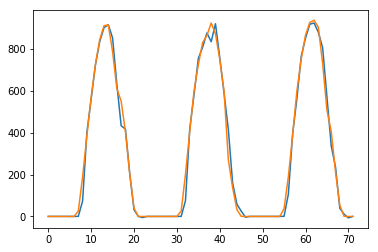

In [4]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

data = pd.read_csv('1month.txt',usecols=['Avg Global Horizontal [W/m^2]'])

scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(data)
#conv_data = scaler.transform(conv_data)

data2 = pd.DataFrame(data1)
conv_data = pd.concat([data2.shift(3),data2.shift(2),data2.shift(1)],axis=1)
conv_data.columns = ['t-3','t-2','t-1']
conv_data = conv_data[3:]
conv_data=conv_data.values
#conv_data = scaler.fit_transform(conv_data)

x= conv_data[:,0:2]
y =conv_data[:,2]
#y.reshape(3117,1)

train_x,test_x,train_y,test_y= train_test_split( x,y, test_size=0.1,shuffle=False)

model = svm.SVR(cache_size=20, coef0=1.0, degree=0, epsilon=0.00001,gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


param_dist = {'C':[0.0001,25e3]
             }


n_iter_search = 2
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(train_x, train_y)

ypred_svr = random_search.predict(test_x)
ypred_svr = ypred_svr.reshape(-1,1)
test_y = test_y.reshape(-1,1)
ypred_svr = scaler.inverse_transform(ypred_svr)
test_y1 = scaler.inverse_transform(test_y)
error_svr = test_y1-ypred_svr
plt.plot(ypred_svr)
plt.plot(test_y1)

In [6]:
mean_absolute_error(test_y1, ypred_svr)


21.413290077669274

In [7]:
mean_squared_error(test_y1, ypred_svr)

1546.7073724609063

In [8]:
median_absolute_error(test_y1, ypred_svr)

9.153090052461266

In [9]:
r2_score(test_y1, ypred_svr) 

0.9873943310568106

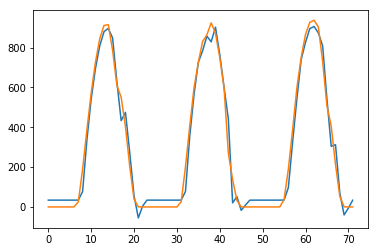

In [10]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

data = pd.read_csv('1month.txt',usecols=['Avg Global Horizontal [W/m^2]'])

scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(data)
#conv_data = scaler.transform(conv_data)

data2 = pd.DataFrame(data1)
conv_data = pd.concat([data2.shift(3),data2.shift(2),data2.shift(1)],axis=1)
conv_data.columns = ['t-3','t-2','t-1']
conv_data = conv_data[3:]
conv_data=conv_data.values
#conv_data = scaler.fit_transform(conv_data)

x= conv_data[:,0:2]
y =conv_data[:,2]
#y.reshape(3117,1)

train_x,test_x,train_y,test_y= train_test_split( x,y, test_size=0.1,shuffle=False)

model = MLPRegressor( activation='relu',
                                       solver='adam',
                                       learning_rate='adaptive',
                                       max_iter=1000)


param_dist = {'hidden_layer_sizes':sp_randint(1,25e3),
              'learning_rate_init':[0.001,0.05],
              'alpha':[0.001,0.05]
             }


n_iter_search = 2
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(train_x, train_y)

ypred_mlp = random_search.predict(test_x)
ypred_mlp = ypred_mlp.reshape(-1,1)
test_y = test_y.reshape(-1,1)
ypred_mlp = scaler.inverse_transform(ypred_mlp)
test_y1 = scaler.inverse_transform(test_y)
error_mlp=test_y1-ypred_mlp
plt.plot(ypred_mlp)
plt.plot(test_y1)

In [11]:
mean_absolute_error(test_y1, ypred_mlp)

42.13209399589841

In [12]:
mean_squared_error(test_y1, ypred_mlp)

2825.601831101065

In [13]:
median_absolute_error(test_y1, ypred_mlp)

34.2144254372554

In [14]:
r2_score(test_y1, ypred_mlp) 

0.9769713380292108

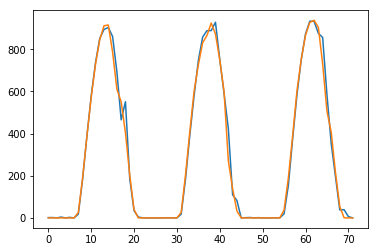

In [26]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

data = pd.read_csv('1month.txt',usecols=['Avg Global Horizontal [W/m^2]'])

scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(data)
#conv_data = scaler.transform(conv_data)

data2 = pd.DataFrame(data1)
conv_data = pd.concat([data2.shift(3),data2.shift(2),data2.shift(1)],axis=1)
conv_data.columns = ['t-3','t-2','t-1']
conv_data = conv_data[3:]
conv_data=conv_data.values
#conv_data = scaler.fit_transform(conv_data)

x= conv_data[:,0:2]
y =conv_data[:,2]
#y.reshape(3117,1)

train_x,test_x,train_y,test_y= train_test_split( x,y, test_size=0.1,shuffle=False)

model = RandomForestRegressor()


param_dist = {"max_depth": [5, None],
              "n_estimators":sp_randint(2,50),
              "bootstrap": [True, False]}


n_iter_search = 2
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(train_x, train_y)

ypred_rf = random_search.predict(test_x)
ypred_rf = ypred_rf.reshape(-1,1)
test_y = test_y.reshape(-1,1)
ypred_rf = scaler.inverse_transform(ypred_rf)
test_y1 = scaler.inverse_transform(test_y)
error_rf = test_y1-ypred_rf
plt.plot(ypred_rf)
plt.plot(test_y1)

In [27]:
mean_absolute_error(test_y1, ypred_rf)

19.90442319027624

In [29]:
mean_squared_error(test_y1, ypred_rf)

1471.1560495646795

In [30]:
median_absolute_error(test_y1, ypred_rf)

6.202234320886621

In [31]:
r2_score(test_y1, ypred_rf)

0.9880100745268469

C:\Users\SAMBIT\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5.86022742, -0.57475315,  1.23626968,  5.80618378]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 16, 'warnflag': 2}
  " state: %s" % convergence_dict)


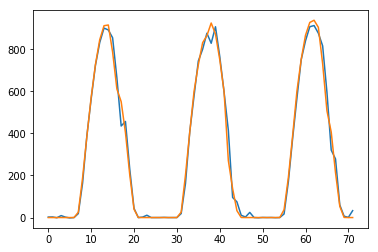

In [42]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

data = pd.read_csv('1month.txt',usecols=['Avg Global Horizontal [W/m^2]'])

scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(data)
#conv_data = scaler.transform(conv_data)

data2 = pd.DataFrame(data1)
conv_data = pd.concat([data2.shift(3),data2.shift(2),data2.shift(1)],axis=1)
conv_data.columns = ['t-3','t-2','t-1']
conv_data = conv_data[3:]
conv_data=conv_data.values
#conv_data = scaler.fit_transform(conv_data)

x= conv_data[:,0:2]
y =conv_data[:,2]
#y.reshape(3117,1)

train_x,test_x,train_y,test_y= train_test_split( x,y, test_size=0.1,shuffle=False)

kernel =   5*RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))* RationalQuadratic(length_scale=1.0, alpha=0.1)
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)

model = model.fit(train_x, train_y)

ypred_gpr = model.predict(test_x)
ypred_gpr = ypred_gpr.reshape(-1,1)
test_y = test_y.reshape(-1,1)
ypred_gpr = scaler.inverse_transform(ypred_gpr)
test_y1 = scaler.inverse_transform(test_y)
error_gpr=test_y1-ypred_gpr
plt.plot(ypred1)
plt.plot(test_y1)

In [43]:
mean_absolute_error(test_y1, ypred_gpr)

21.13048500523363

In [44]:
mean_squared_error(test_y1, ypred_gpr)

1320.5502795520233

In [45]:
median_absolute_error(test_y1, ypred_gpr)

8.204262789977554

In [46]:
r2_score(test_y1, ypred_gpr) 

0.989237511928075

Epoch 1/500
644/644 [==============================] - 1s 877us/step - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 2/500
644/644 [==============================] - 0s 89us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 3/500
644/644 [==============================] - 0s 64us/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 4/500
644/644 [==============================] - 0s 57us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 5/500
644/644 [==============================] - 0s 62us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 6/500
644/644 [==============================] - 0s 67us/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 7/500
644/644 [==============================] - 0s 61us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 8/500
644/644 [==============================] - 0s 62us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 9/500
644/644 [==============================] - 0s 54us/step - loss: 0.0042 - mean_squared_error

Epoch 73/500
644/644 [==============================] - 0s 61us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 74/500
644/644 [==============================] - 0s 59us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 75/500
644/644 [==============================] - 0s 57us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 76/500
644/644 [==============================] - 0s 57us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 77/500
644/644 [==============================] - 0s 54us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 78/500
644/644 [==============================] - 0s 53us/step - loss: 0.0038 - mean_squared_error: 0.0038   
Epoch 79/500
644/644 [==============================] - 0s 53us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 80/500
644/644 [==============================] - 0s 53us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 81/500
644/644 [==============================] - 0s 56us/step - loss: 0.0038 - mean_sq

644/644 [==============================] - 0s 56us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 144/500
644/644 [==============================] - 0s 67us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 145/500
644/644 [==============================] - 0s 84us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 146/500
644/644 [==============================] - 0s 45us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 147/500
644/644 [==============================] - 0s 56us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 148/500
644/644 [==============================] - 0s 47us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 149/500
644/644 [==============================] - 0s 56us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 150/500
644/644 [==============================] - 0s 47us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 151/500
644/644 [==============================] - 0s 56us/step - loss: 0.0034 - mean_squared_er

Epoch 214/500
644/644 [==============================] - 0s 56us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 215/500
644/644 [==============================] - 0s 62us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 216/500
644/644 [==============================] - 0s 50us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 217/500
644/644 [==============================] - 0s 51us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 218/500
644/644 [==============================] - 0s 50us/step - loss: 0.0031 - mean_squared_error: 0.0031   
Epoch 219/500
644/644 [==============================] - 0s 51us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 220/500
644/644 [==============================] - 0s 50us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 221/500
644/644 [==============================] - 0s 50us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 222/500
644/644 [==============================] - 0s 54us/step - loss: 0.0031 

644/644 [==============================] - 0s 54us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 284/500
644/644 [==============================] - 0s 51us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 285/500
644/644 [==============================] - 0s 70us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 286/500
644/644 [==============================] - 0s 57us/step - loss: 0.0030 - mean_squared_error: 0.0030   
Epoch 287/500
644/644 [==============================] - 0s 70us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 288/500
644/644 [==============================] - 0s 59us/step - loss: 0.0031 - mean_squared_error: 0.0031   
Epoch 289/500
644/644 [==============================] - 0s 51us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 290/500
644/644 [==============================] - 0s 50us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 291/500
644/644 [==============================] - 0s 53us/step - loss: 0.0028 - mean_squa

644/644 [==============================] - 0s 56us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 355/500
644/644 [==============================] - 0s 54us/step - loss: 0.0028 - mean_squared_error: 0.0028   
Epoch 356/500
644/644 [==============================] - 0s 62us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 357/500
644/644 [==============================] - 0s 53us/step - loss: 0.0027 - mean_squared_error: 0.0027   
Epoch 358/500
644/644 [==============================] - 0s 47us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 359/500
644/644 [==============================] - 0s 57us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 360/500
644/644 [==============================] - 0s 51us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 361/500
644/644 [==============================] - 0s 51us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 362/500
644/644 [==============================] - 0s 53us/step - loss: 0.0027 - mean_squa

644/644 [==============================] - 0s 51us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 425/500
644/644 [==============================] - 0s 53us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 426/500
644/644 [==============================] - 0s 82us/step - loss: 0.0026 - mean_squared_error: 0.0026   
Epoch 427/500
644/644 [==============================] - 0s 59us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 428/500
644/644 [==============================] - 0s 57us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 429/500
644/644 [==============================] - 0s 54us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 430/500
644/644 [==============================] - 0s 56us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 431/500
644/644 [==============================] - 0s 50us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 432/500
644/644 [==============================] - 0s 50us/step - loss: 0.0027 - mean_squared

644/644 [==============================] - 0s 57us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 496/500
644/644 [==============================] - 0s 56us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 497/500
644/644 [==============================] - 0s 59us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 498/500
644/644 [==============================] - 0s 51us/step - loss: 0.0027 - mean_squared_error: 0.0027   
Epoch 499/500
644/644 [==============================] - 0s 53us/step - loss: 0.0026 - mean_squared_error: 0.0026   
Epoch 500/500
644/644 [==============================] - 0s 59us/step - loss: 0.0026 - mean_squared_error: 0.0026   


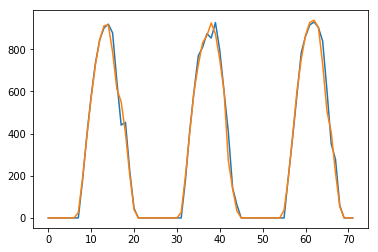

In [79]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

data = pd.read_csv('1month.txt',usecols=['Avg Global Horizontal [W/m^2]'])

scaler = MinMaxScaler()
data1 = scaler.fit_transform(data)
#conv_data = scaler.transform(conv_data)

data2 = pd.DataFrame(data1)
conv_data = pd.concat([data2.shift(3),data2.shift(2),data2.shift(1)],axis=1)
conv_data.columns = ['t-3','t-2','t-1']
conv_data = conv_data[3:]
conv_data=conv_data.values
#conv_data = scaler.fit_transform(conv_data)

x= conv_data[:,0:2]
y =conv_data[:,2]
#y.reshape(3117,1)

train_x,test_x,train_y,test_y= train_test_split( x,y, test_size=0.1,shuffle=False)

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])
model.fit(train_x, train_y, epochs=500, batch_size=32)

ypred_dnn = model.predict(test_x,batch_size=32)
ypred_dnn = ypred_dnn.reshape(-1,1)
test_y = test_y.reshape(-1,1)
ypred_dnn = scaler.inverse_transform(ypred_dnn)
test_y1 = scaler.inverse_transform(test_y)
error_dnn = test_y1-ypred_dnn
plt.plot(ypred_dnn)
plt.plot(test_y1)

In [88]:
mean_absolute_error(test_y1, ypred_dnn)

18.19417099787242

In [81]:
mean_squared_error(test_y1, ypred_dnn)

1246.182968954189

In [82]:
median_absolute_error(test_y1, ypred_gpr)

8.204262789977554

In [87]:
r2_score(test_y1, ypred_gpr) 

0.989237511928075